# Decision Trees

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
drugs = pd.read_csv('drug200.csv')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [42]:
drugs.shape

(200, 6)

In [43]:
X = drugs.drop(['Drug'], axis = 1)
y = drugs['Drug']

In [44]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [45]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_cholestrol = LabelEncoder()

In [46]:
X['sex_n'] = le_sex.fit_transform(X['Sex'])
X['BP_n'] = le_BP.fit_transform(X['BP'])
X['cholestrol_n'] = le_cholestrol.fit_transform(X['Cholesterol'])
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K,sex_n,BP_n,cholestrol_n
0,23,F,HIGH,HIGH,25.355,0,0,0
1,47,M,LOW,HIGH,13.093,1,1,0
2,47,M,LOW,HIGH,10.114,1,1,0
3,28,F,NORMAL,HIGH,7.798,0,2,0
4,61,F,LOW,HIGH,18.043,0,1,0


In [47]:
inputs_n = X.drop(['Sex', 'BP', 'Cholesterol'], axis='columns')
inputs_n

,Age,Na_to_K,sex_n,BP_n,cholestrol_n
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0
...,...,...,...,...,...
195,56,11.567,0,1,0
196,16,12.006,1,1,0
197,52,9.894,1,2,0
198,23,14.020,1,2,1


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size = 0.35, random_state = 2)

In [49]:
X_train.shape

(130, 5)

In [50]:
X_test.shape

(70, 5)

In [51]:
X_test.head()

,Age,Na_to_K,sex_n,BP_n,cholestrol_n
112,35,9.170,1,1,1
29,45,17.951,1,1,0
182,20,11.686,0,1,1
199,40,11.349,0,1,1
193,72,6.769,1,1,0


In [52]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9429
Training-set accuracy score: 0.9077


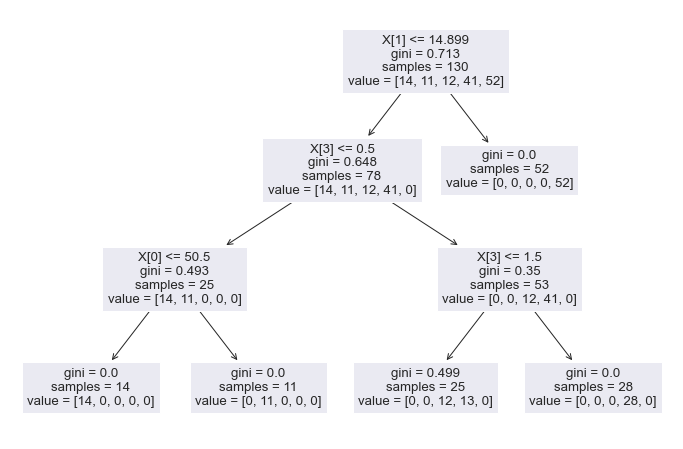

In [54]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 
plt.show()

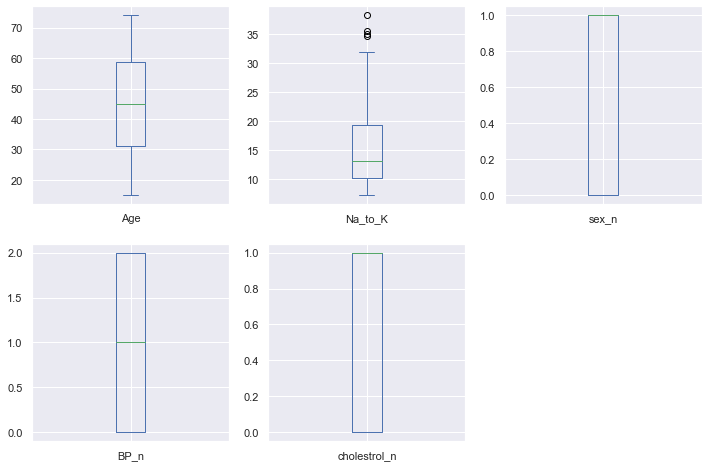

In [55]:
X_train.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(12,8))
plt.show()

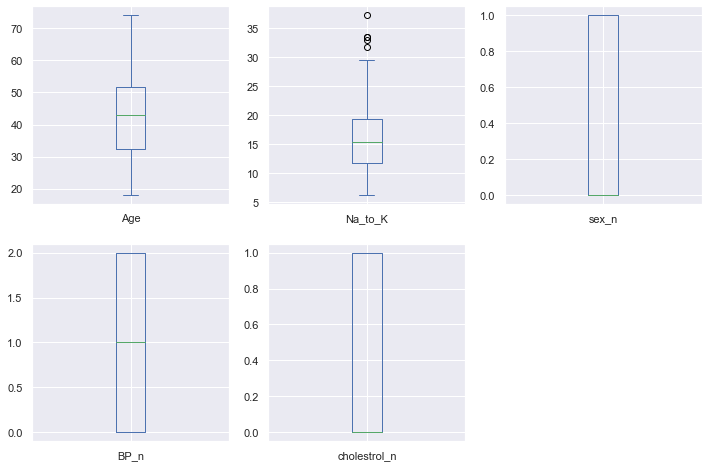

In [56]:
X_test.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,  figsize=(12,8))
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_gini)

array([[ 9,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 39]], dtype=int64)

Confusion matrix shows that chance of error in prediction is low.

In [58]:
import seaborn as sns

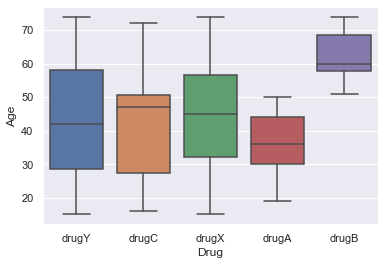

In [59]:
sns.set_theme(style="darkgrid")
sns.boxplot(x= "Drug", y="Age", data = drugs)
plt.show()

Gini index gives a high model accuracy score of 94.29%